Урок 4. Статистические инструменты для проведения A/b тестирования. Практика работы с инструментами

Задание 1. Чистка датасета

Изучите датасет в Jupyter Notebook и ответьте на вопросы.

• Есть ли дубли в данных? Если есть — удалите их (drop_duplicates).
• Найдите и удалите выбросы по признаку home_cost.

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801



Про Датасет

Датасет представляет собой информацию по жителям некоторого города.

    was_married - Был ли когда-либо женат/замужем
    children - Количество детей
    salary - Уровень зарплаты
    sex - Пол (0 - женщина, 1 - мужчина)
    age - Возраст
    home_cost - Сумарная стоимость жилья/недвижимости
    Professon - Профессия
    drive_info - Есть ли водительские права
    happyness - уровень счастья по результатам опроса



In [3]:
data_work = data.drop_duplicates(keep='first')

# Создание диапазонов стоимости жилья и подсчёт количества значений в каждом диапазоне:

# Параметры для генерации диапазонов
min_value = data_work['home_cost'].min()
max_value = data_work['home_cost'].max()
step = 500000
print("Параметры:", min_value, max_value, step)

# Генерация диапазонов с использованием np.arange
bins = np.arange(min_value, max_value + step, step)

# Создание категорий на основе диапазонов
data_work["home_cost_bins"] = pd.cut(data_work["home_cost"], bins)

# Подсчёт количества значений в каждом диапазоне
grouped_data = data_work["home_cost_bins"].value_counts()

# sort_index(): Сортирует результат по индексам (т.е. по самим диапазонам).
print(grouped_data.sort_index())

# Сохранение в текстовый файл
# with open("grouped_data.txt", "w") as file:
#     file.write(grouped_data.sort_index().to_string())

data_work = data_work.loc[data_work['home_cost'] < 10600000].copy()  #  удилить выбросы
print("\nРазмеры датасета", data_work.shape)

Параметры: 9824378.17956564 20657915.51438855 500000
home_cost_bins
(9824378.18, 10324378.18]     5223
(10324378.18, 10824378.18]     770
(10824378.18, 11324378.18]       0
(11324378.18, 11824378.18]       0
(11824378.18, 12324378.18]       0
(12324378.18, 12824378.18]       0
(12824378.18, 13324378.18]       0
(13324378.18, 13824378.18]       0
(13824378.18, 14324378.18]       0
(14324378.18, 14824378.18]       0
(14824378.18, 15324378.18]       0
(15324378.18, 15824378.18]       0
(15824378.18, 16324378.18]       0
(16324378.18, 16824378.18]       0
(16824378.18, 17324378.18]       0
(17324378.18, 17824378.18]       0
(17824378.18, 18324378.18]       0
(18324378.18, 18824378.18]       0
(18824378.18, 19324378.18]       0
(19324378.18, 19824378.18]       2
(19824378.18, 20324378.18]       2
(20324378.18, 20824378.18]       1
Name: count, dtype: int64

Размеры датасета (5995, 10)


Задание 2. Проверка гипотез с применением критериев

1. Перед вами гипотезы из прошлого домашнего задания. Вы уже научились проверять утверждения визуально. Теперь используйте подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы.

— Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?
— Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?
— Правда ли, что те, у кого больше трёх детей, зарабатывают в среднем больше, чем те, у кого их меньше или трое?
— Правда ли, что художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?
— Правда ли, что недвижимость тех, кто когда-либо был в браке, в среднем дороже, чем у тех, кто никогда не был в браке?
— Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?
— Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

In [5]:
def show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all):
    # Определение фигуры с несколькими графиками
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Гистограмма
    bins = 15
    axes[0].hist(v_1[column2compare], bins=bins, alpha=0.9, edgecolor="black", label=value2selection[0])
    axes[0].hist(v_2[column2compare], bins=bins, alpha=0.7, label=value2selection[1])
    axes[0].legend(loc="upper right")
    axes[0].set_title("Гистограмма значений " + column2selection)
    axes[0].set_xlabel(column2compare)
    axes[0].set_ylabel("Количество")

    # Боксплот
    sns.boxplot(x=column2selection, y=column2compare, data=v_all, ax=axes[1])
    axes[1].set_title("Боксплот " + column2selection)
    axes[1].set_xlabel(column2selection)
    axes[1].set_ylabel(column2compare)

    # Настройка отступов между графиками
    plt.tight_layout()

    # Отображение графиков
    plt.show()

    # Bootstrap: повторяющаяся выборка среднего значения
    boot_1d = [
        v_all.sample(frac=1, replace=True).groupby(column2selection)[column2compare].mean()
        for _ in range(1000)
    ]

    # Преобразование в DataFrame
    boot_1d = pd.DataFrame(boot_1d)

    # Плотность распределений (KDE) для бутстрепированных значений
    fig, ax = plt.subplots(figsize=(18, 6))
    boot_1d.plot(kind="density", ax=ax)
    ax.set_title("Плотность распределений средних значений (Bootstrapping)")
    ax.set_xlabel(column2compare)
    ax.set_ylabel("Плотность")
    plt.show()
    return boot_1d


def show_criteria(column2compare, v_1, v_2, boot_1d):
    print("Тест Шапиро на нормальность распределения ", column2compare)
    statistic, p_value = scipy.stats.shapiro(data_work[column2compare])
    print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        # H_0 = Распределение нормальное
        print("Нормальное распределение (не отвергаем H0)")
    else:
        print("Не нормальное распределения (отвергаем H0)")

    ##############
    print("\nПроверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.ttest_ind(v_1[column2compare], v_2[column2compare])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

    ##############
    print("\nПроверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.mannwhitneyu(v_1[column2compare], v_2[column2compare])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

    ##############
    print("\nПроверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.ttest_ind(boot_1d[value2selection[0]], boot_1d[value2selection[1]])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

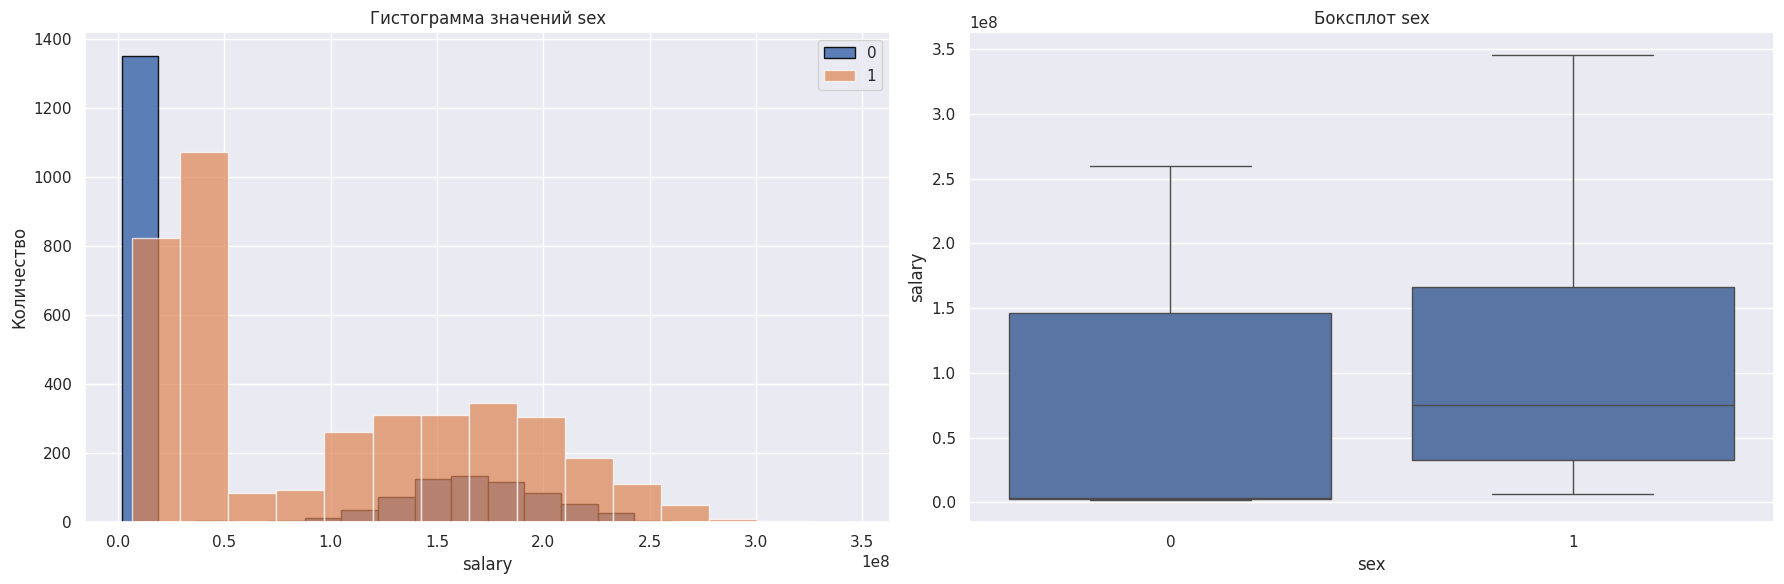

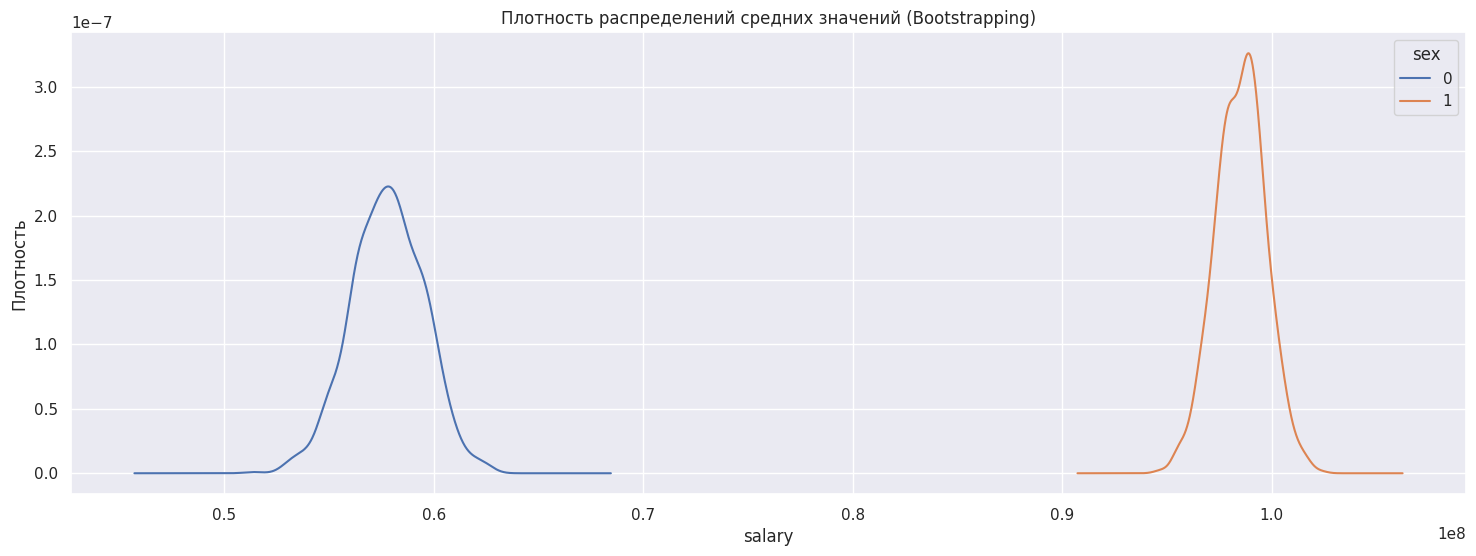

In [6]:

column2compare = "salary"
column2selection = "sex"
value2selection = [0, 1]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)



In [7]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  salary
Статистики=0.861, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5995.
  res = hypotest_fun_out(*samples, **kwds)


Отвергаем нулевую гипотезу, что женщины в среднем имеют более высокую зарплату, чем мужчины

Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

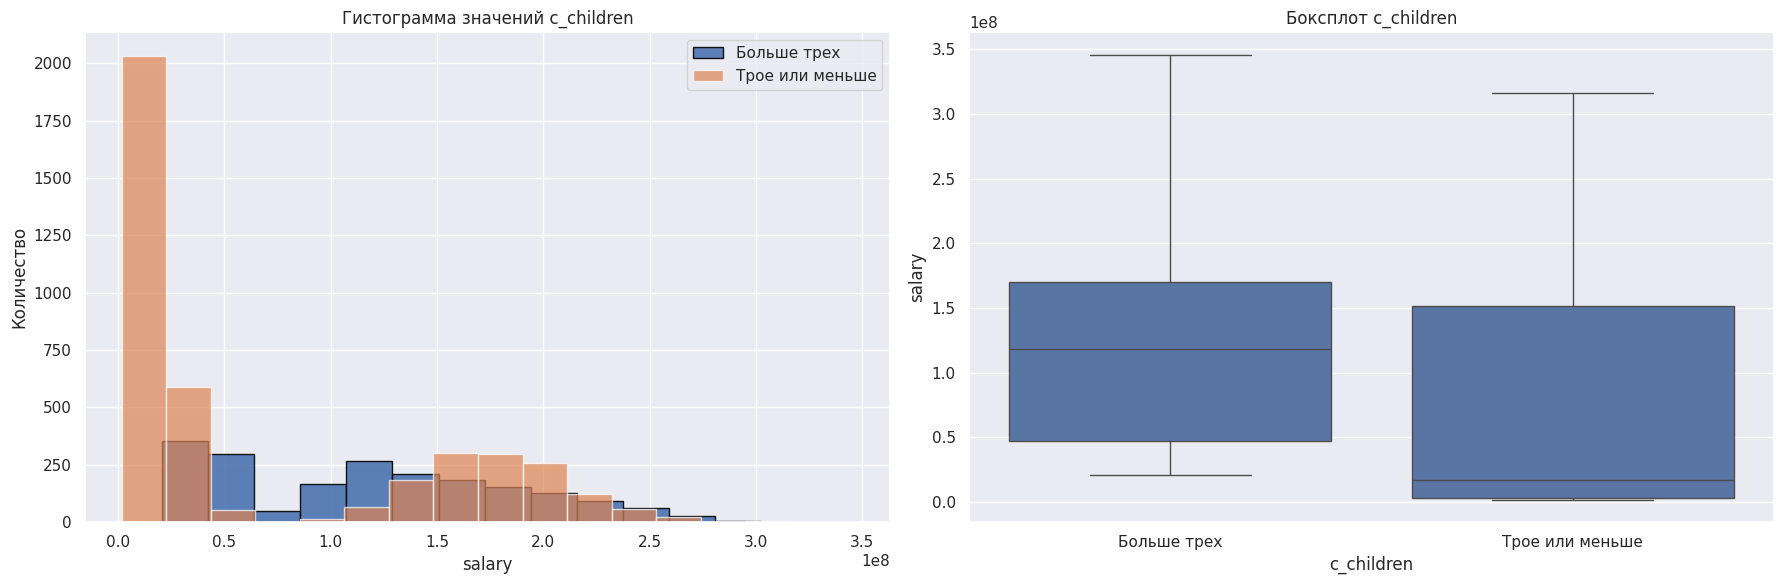

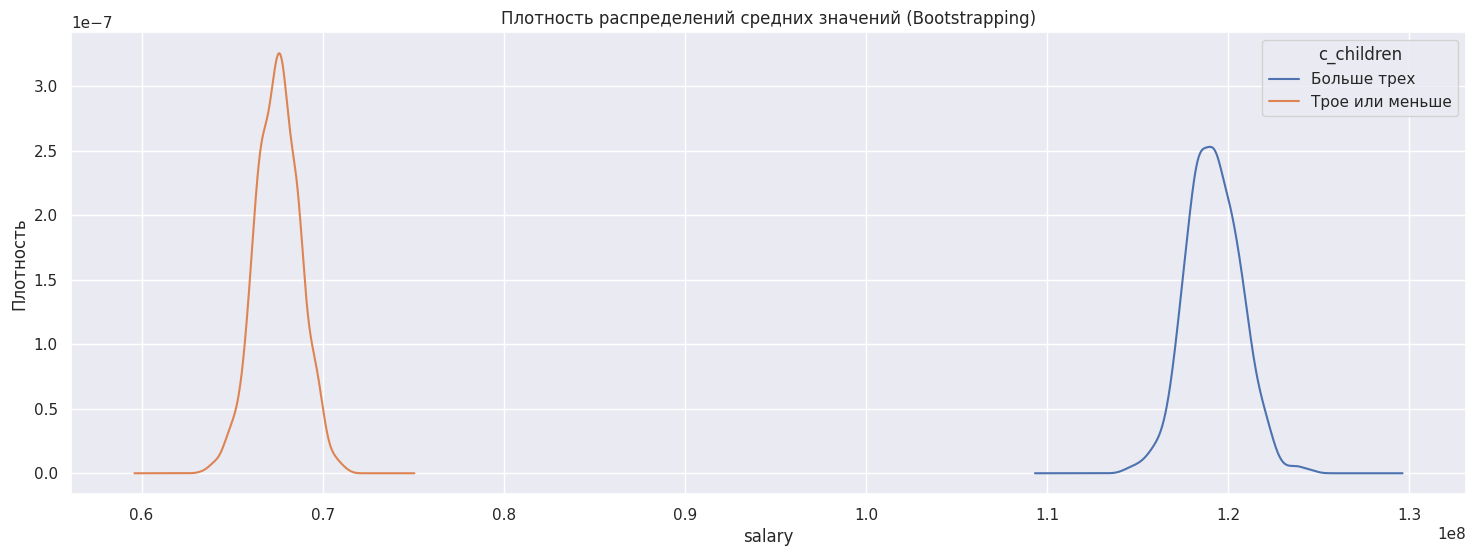

In [8]:
data_work['c_children'] = [
    "Больше трех" if x > 3 else "Трое или меньше" for x in data_work["children"]
]

column2compare = "salary"
column2selection = "c_children"
value2selection = ["Больше трех", "Трое или меньше"]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [ ]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Разные распределения. Подтверждаем гипотезу, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей

Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

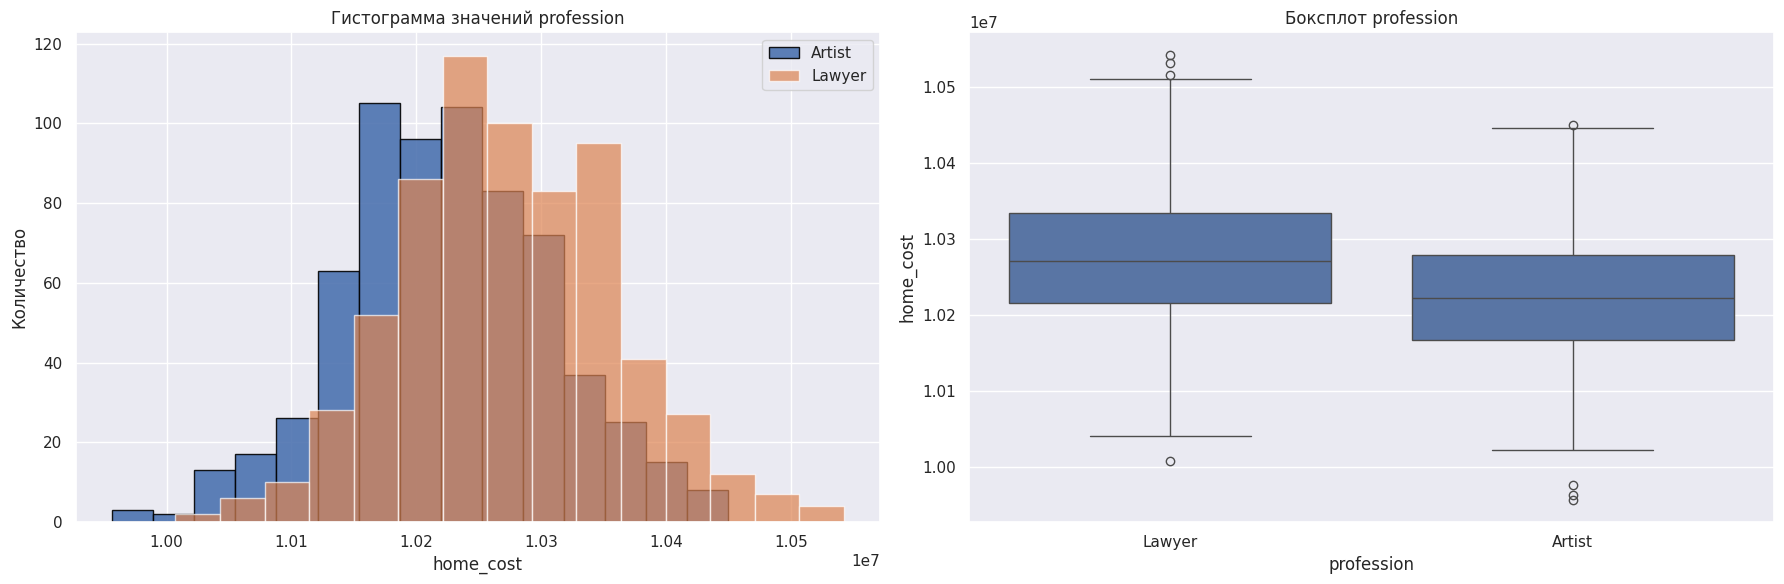

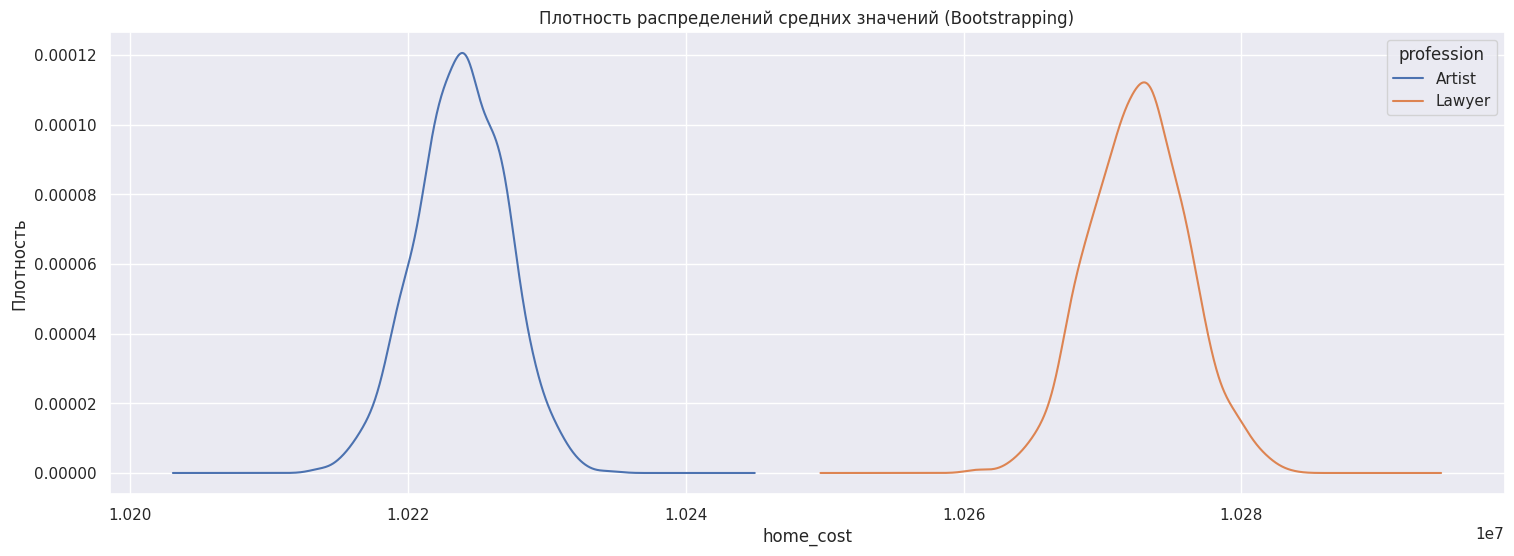

In [9]:
column2compare = "home_cost"
column2selection = "profession"
value2selection = ["Artist", "Lawyer"]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [10]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  home_cost
Статистики=0.995, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5995.
  res = hypotest_fun_out(*samples, **kwds)


Разные распределения. Подтверждаем гипотезу, что художники (Artist) живут в домах, которые в среднем дешевле, чем дома адвокатов (Lawyer)

Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?

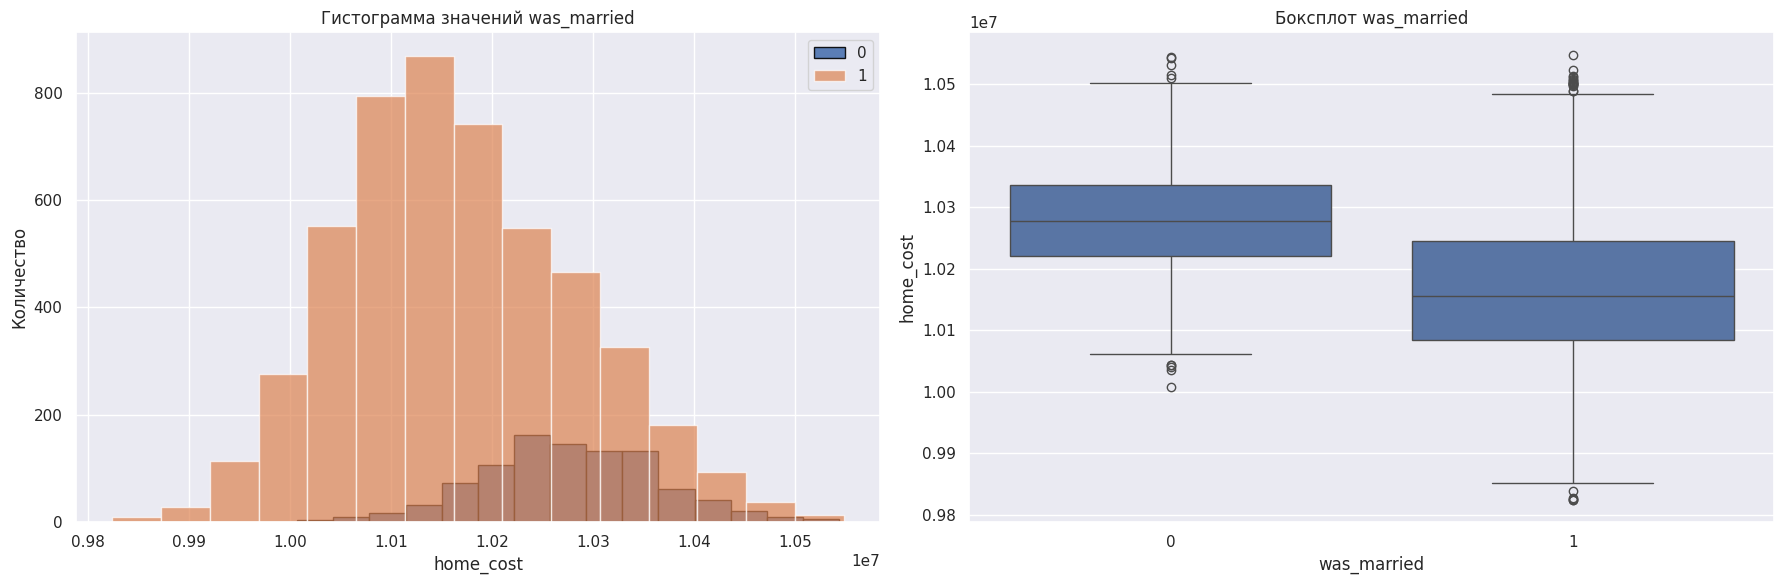

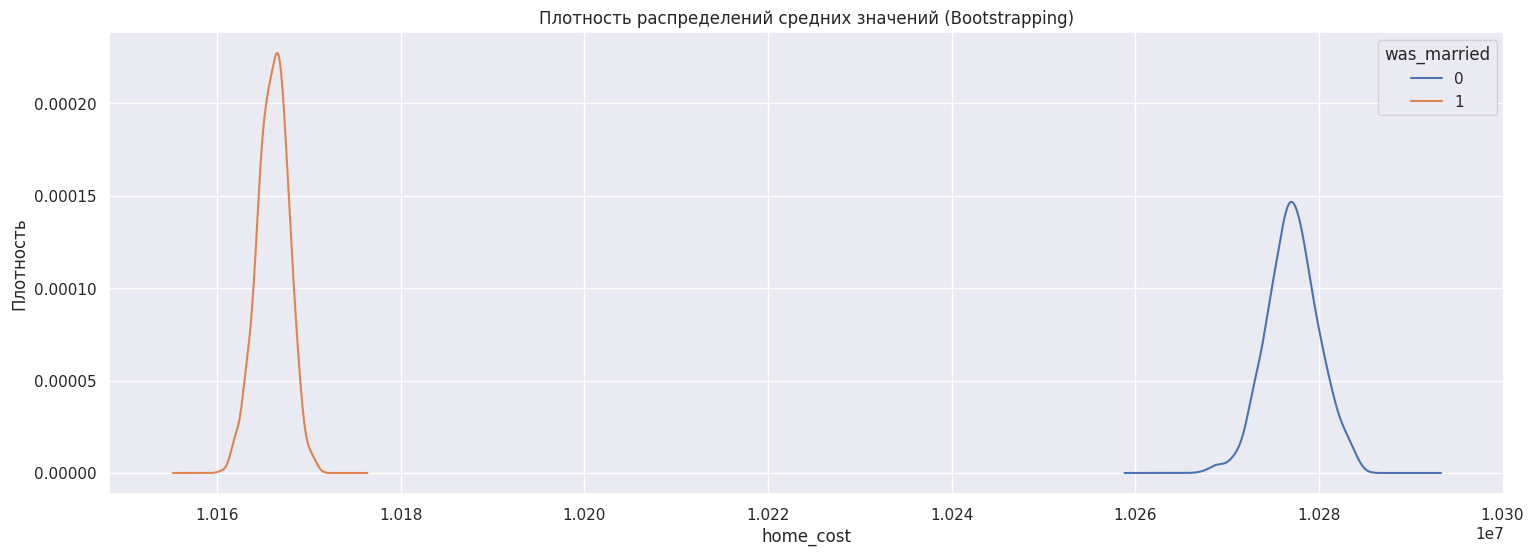

In [11]:
column2compare = "home_cost"
column2selection = "was_married"
value2selection = [0, 1]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [12]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  home_cost
Статистики=0.995, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5995.
  res = hypotest_fun_out(*samples, **kwds)


Разные распределения. Подтверждаем гипотезу, что недвижимость у тех, кто когда-либо был в браке в среднем дешевле, чем у тех, кто никогда не был в браке

Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

In [13]:
# Создание таблицы сопряжённости
contingency_table = pd.crosstab(data_work["sex"], data_work["was_married"])

# Вывод таблицы сопряжённости
print("Таблица сопряжённости:")
print(contingency_table)

# Применение критерия хи-квадрат
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

# Вывод результатов
print(f"\nСтатистика хи-квадрат: {chi2}")
print(f"p-value: {p}")
print(f"Степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация результата
alpha = 0.05
if p < alpha:
    print("\nзависимость между полом и наличием брака существует.")
else:
    print("\nзависимость между полом и наличием брака не выявлена.")

Таблица сопряжённости:
was_married    0     1
sex                   
0            670  1358
1            278  3689

Статистика хи-квадрат: 681.036720317365
p-value: 3.97625859922564e-150
Степени свободы: 1
Ожидаемые значения:
[[ 320.6912427 1707.3087573]
 [ 627.3087573 3339.6912427]]

зависимость между полом и наличием брака существует.


ависимость между полом и наличием брака существует. Мужчины в среднем чаще бывают в браке, чем женщины

Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

In [14]:
# Медианная зарплата и средняя зарплата
median_salary = data_work["salary"].median()
mean_salary = data_work["salary"].mean()

# Группы:
# Женщины с зарплатой выше медианной
women_above_median = data_work[(data_work["sex"] == 0) & (data_work["salary"] > median_salary)]

# Мужчины с зарплатой выше средней
men_above_mean = data_work[(data_work["sex"] == 1) & (data_work["salary"] > mean_salary)]

# Среднее значение счастья для каждой группы
mean_happyness_women = women_above_median["happyness"].mean()
mean_happyness_men = men_above_mean["happyness"].mean()

print(f"Среднее счастье женщин с зарплатой выше медианной: {mean_happyness_women}")
print(f"Среднее счастье мужчин с зарплатой выше средней: {mean_happyness_men}")

# Применение t-теста Стьюдента для сравнения средних уровней счастья
t_stat, p_value = scipy.stats.ttest_ind(women_above_median["happyness"], men_above_mean["happyness"], equal_var=False)

print(f"\nT-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("\nразличие в уровне счастья статистически значимо.")
else:
    print("\nстатистически значимого различия в уровне счастья нет.")

Среднее счастье женщин с зарплатой выше медианной: 0.33953478386539976
Среднее счастье мужчин с зарплатой выше средней: 0.5559373105766131

T-статистика: -40.12018759659843
P-значение: 1.627707438976648e-235

различие в уровне счастья статистически значимо.




Зависимость между уровнем счастья женщин с зарплатой выше медианной и мужчин с зарплатой выше средней существует.

Не правда, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней
